In [3]:
p_even_tail_count =  1 / 8
p_odd_tail_count = 1 - p_even_tail_count
for i in range(3, 235):
    p_tail = 1 / (i ** 3 + 7)
    p_no_tail = 1 - p_tail
    p_odd_tail_count = p_odd_tail_count * p_no_tail + p_even_tail_count * p_tail
    p_even_tail_count = 1 - p_odd_tail_count
    p_odd_head_count = 1 - p_even_tail_count
    print(i, p_even_tail_count, p_odd_head_count)

3 0.1470588235294118 0.8529411764705882
4 0.1570008285004142 0.8429991714995858
5 0.1621977856443474 0.8378022143556526
6 0.16522740191659546 0.8347725980834045
7 0.1671403881913579 0.8328596118086421
8 0.16842308419062058 0.8315769158093794
9 0.16932410841836343 0.8306758915816366
10 0.16998086292001524 0.8300191370799848
11 0.17047416506811697 0.829525834931883
12 0.17085402193835542 0.8291459780616446
13 0.17115270249920989 0.8288472975007901
14 0.17139177723385246 0.8286082227661475
15 0.1715861049823837 0.8284138950176163
16 0.17174618974719846 0.8282538102528015
17 0.1718796262554313 0.8281203737445687
18 0.17199201549117193 0.8280079845088281
19 0.17208756107360978 0.8279124389263902
20 0.17216946751520512 0.8278305324847949
21 0.172240212127308 0.827759787872692
22 0.1723017343774953 0.8276982656225047
23 0.17235557013659208 0.8276444298634079
24 0.1724029484071239 0.8275970515928761
25 0.17244486205241472 0.8275551379475853
26 0.1724821202151796 0.8275178797848204
27 0.1725153

75 0.8


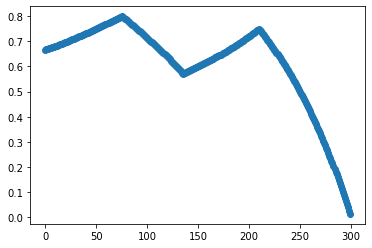

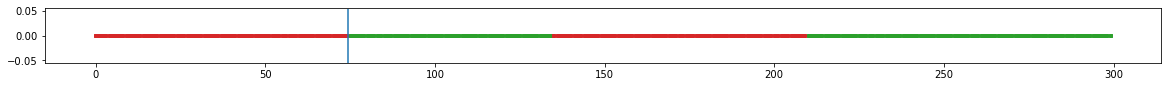

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


yandex_data =  [0] * 75 + [1] * 45 + \
    [1] * 15  + [0] * 30 + \
     [0] * 45  + [1] * 90

# args: binary list (0-1 values) and threshold
def precision(data, threshold):
    # positive: data[threshold:] 
    # negative: data[:threshold]
    TP = sum(data[threshold:]) 
    FP = len(data[threshold:]) - TP
    if TP == 0 and FP == 0:
        return 0
    return TP / (TP + FP)

def recall(data, threshold):
    TP = sum(data[threshold:])
    FN = sum(data[:threshold])
    if TP == 0 and FN == 0:
        return 0
    return TP / (TP + FN)

def f_score(data, threshold):
    # print(threshold)
    _precision = precision(data, threshold)
    _recall = recall(data, threshold)
    if _precision == 0 and _recall == 0:
        return 0
    return 2 * _precision * _recall / (_precision + _recall)



X = []
y = []
for t in range(300):
    X.append(t)
    y.append(f_score(yandex_data, t))
    #print(t, f_score(yandex_data, t))
print(y.index(max(y)), max(y))
threshold = y.index(max(y))

plt.scatter(X, y)

fig = plt.figure(figsize=(20, 1))
plt.scatter(range(300), [0] * 300, marker='s',
           c=['tab:green' if res == 1 else 'tab:red' for res in yandex_data], s=10)
plt.scatter([threshold - 0.5], [0], marker='|', s=3000)